# Campus placement(Data collect & preparation:task2

In [1]:
#import libraries

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [ ]:

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn import svm

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
uploads=files.upload()

Saving campus placement.csv to campus placement.csv


# Read the dataset

In [ ]:
#Read the file a

In [ ]:
df=pd.read_csv('/content/campus placement.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# Data preparation

In [ ]:
#checking data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [ ]:
#checking null values
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [ ]:
#creating new column
df['CGPA_']=['1-8' if x<=5 else "1-3" if x>5 and x<=6 else '7+' for x in df['CGPA']]
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,CGPA_
0,22,Male,Electronics And Communication,1,8,1,1,1,7+
1,21,Female,Computer Science,0,7,1,1,1,7+
2,22,Female,Information Technology,1,6,0,0,1,1-3
3,21,Male,Information Technology,0,8,0,1,1,7+
4,22,Male,Mechanical,0,8,1,0,1,7+


# Removing data

In [ ]:
#Removing Hostel_column
df=df.drop(['Hostel'],axis=1)

In [ ]:
df=df.drop(['CGPA_'],axis=1)

In [ ]:
df

In [ ]:
#finding the shape of data
df.shape

(2966, 7)

# Handling missing value

In [ ]:
#finding null values
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

In [ ]:
#creating dummy dataframe for categorical values
df_cat=df.select_dtypes(include='int')
df_cat.head()

,Age,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,8,1,1
1,21,0,7,1,1
2,22,1,6,0,1
3,21,0,8,1,1
4,22,0,8,0,1


In [ ]:
#descriptive analysis
df.describe(include='all')

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966,2966,2966.000000,2966.000000,2966.000000,2966.000000
unique,NaN,2,6,NaN,NaN,NaN,NaN
top,NaN,Male,Computer Science,NaN,NaN,NaN,NaN
freq,NaN,2475,776,NaN,NaN,NaN,NaN
mean,21.485840,NaN,NaN,0.703641,7.073837,0.192178,0.552596
std,1.324933,NaN,NaN,0.740197,0.967748,0.394079,0.497310
min,19.000000,NaN,NaN,0.000000,5.000000,0.000000,0.000000
25%,21.000000,NaN,NaN,0.000000,6.000000,0.000000,0.000000
50%,21.000000,NaN,NaN,1.000000,7.000000,0.000000,1.000000
75%,22.000000,NaN,NaN,1.000000,8.000000,0.000000,1.000000


In [ ]:
#handling categorical  values
df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],
[0,1,2,3,4,5])

In [ ]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

In [ ]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,2,1,8,1,1
1,21,0,0,0,7,1,1
2,22,0,1,1,6,0,1
3,21,1,1,0,8,1,1
4,22,1,3,0,8,0,1


In [ ]:
#descriptive analysis
df.describe(include='all')

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.834457,1.932569,0.703641,7.073837,0.192178,0.552596
std,1.324933,0.371732,1.682618,0.740197,0.967748,0.394079,0.497310
min,19.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,21.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,21.000000,1.000000,2.000000,1.000000,7.000000,0.000000,1.000000
75%,22.000000,1.000000,3.000000,1.000000,8.000000,0.000000,1.000000
max,30.000000,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000


In [ ]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,1,2,1,8,1,1
1,21,0,0,0,7,1,1
2,22,0,1,1,6,0,1
3,21,1,1,0,8,1,1
4,22,1,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,1,1,0,7,0,0
2962,23,1,3,1,7,0,0
2963,22,1,1,1,7,0,0
2964,22,1,0,1,7,0,0


In [ ]:
#data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                2966 non-null   int64
 1   Gender             2966 non-null   int64
 2   Stream             2966 non-null   int64
 3   Internships        2966 non-null   int64
 4   CGPA               2966 non-null   int64
 5   HistoryOfBacklogs  2966 non-null   int64
 6   PlacedOrNot        2966 non-null   int64
dtypes: int64(7)
memory usage: 162.3 KB


In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [ ]:
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

<Axes: >

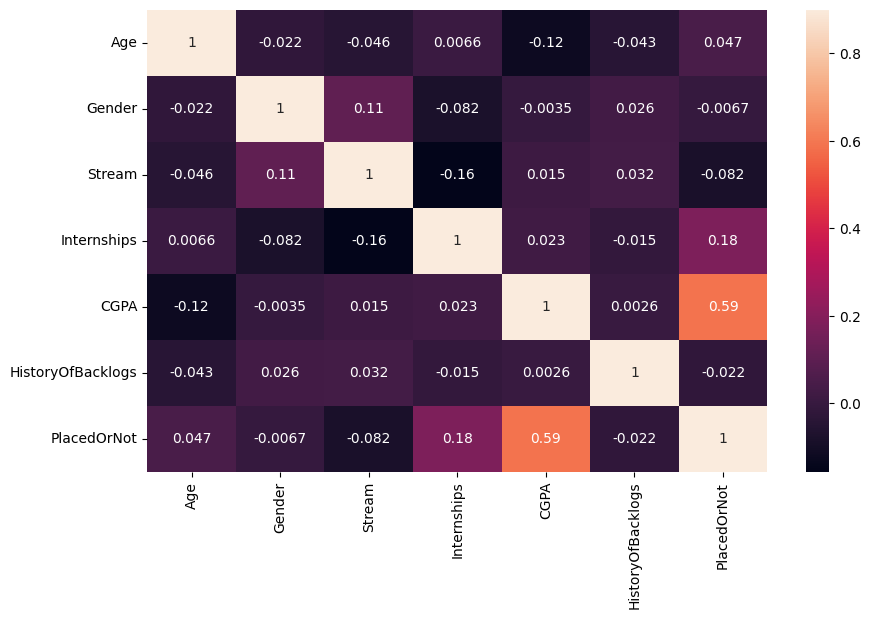

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(df.corr(),vmax=0.9,annot=True)


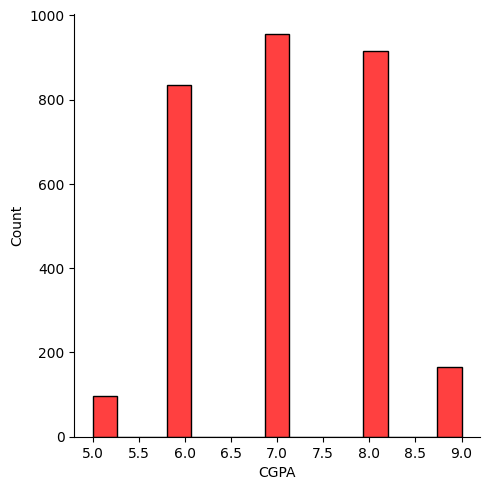

In [ ]:
#check data distribution

sns.displot(df['CGPA'],color='red')

<Axes: >

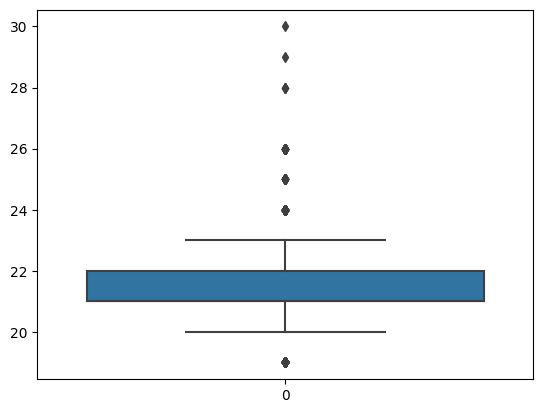

In [ ]:
#handling outliers
sns.boxplot(df['Age'])

# Outliers counting

In [ ]:
#finding the count of outliers
#IQR = q3-q1      upperbound=q3+(1.5*IQR), lower bound=q1-(1.5*IQR)
q1 = np.quantile(df['Age'],0.25)
q3 = np.quantile(df['Age'],0.75)
print('Q1 = {}'.format(q1))
print('Q3 = {}'.format(q3))
IQR=q3-q1
print('IQR value is{}'.format(IQR))
upperBound=q3+(1.5*IQR)
lowerBound=q1-(1.5*IQR)
print('the upper bound value is {} & the lower bound value is {}'.format(upperBound,lowerBound))

Q1 = 21.0
Q3 = 22.0
IQR value is1.0
the upper bound value is 23.5 & the lower bound value is 19.5


In [ ]:
#skwed data
print ('skwed data:',len(df[df['Age']>upperBound]))


skwed data: 215


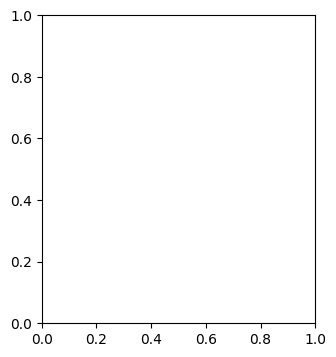

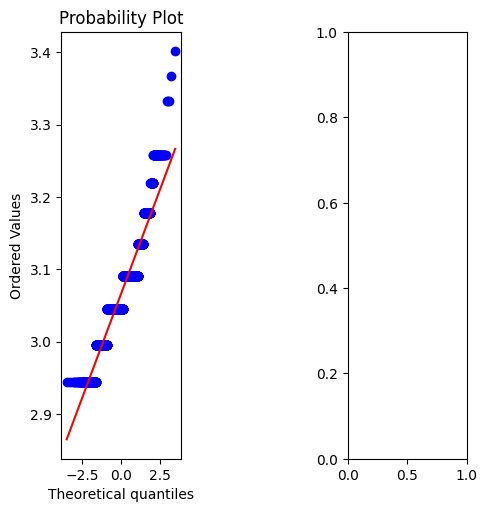

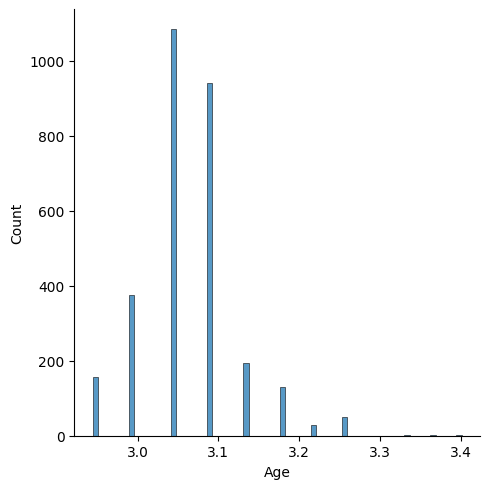

In [ ]:

#handling outline

from scipy import stats
plt.figure(figsize=(12,4))
plt.subplot(1,3,2)
sns.displot(df['Age'])
plt.subplot(1,3,1)
stats.probplot(np.log(df['Age']),plot=plt)
plt.subplot(1,3,3)
sns.displot(np.log(df['Age']))

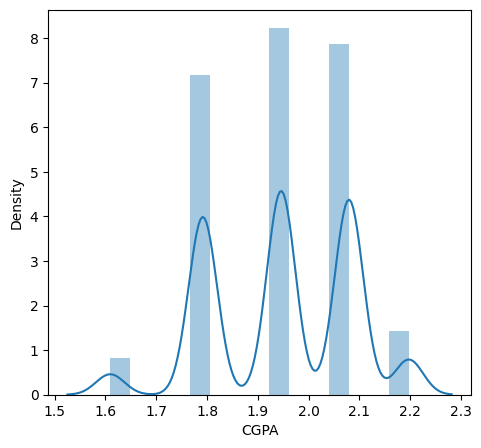

In [ ]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)
transformationplot(np.log(df['CGPA']))

# Visual Analysis task3

In [ ]:
#Task 3
#exploratory data Analysis

<Axes: xlabel='PlacedOrNot', ylabel='Density'>

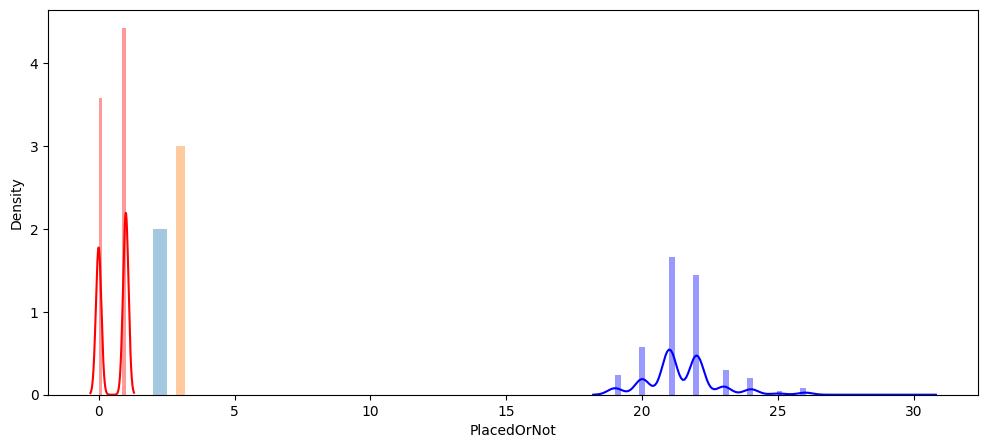

In [ ]:
plt.figure(figsize=(12,5))
sns.distplot(2,2,2)
sns.distplot(df['Age'],color='blue')
sns.distplot(3,3,3)
sns.distplot(df['PlacedOrNot'],color='red')


In [ ]:
#visual analysis

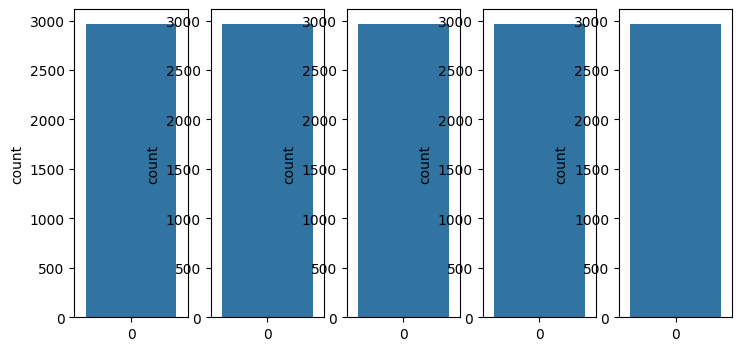

In [ ]:
plt.figure(figsize=(12,4))
for i,j in enumerate(df_cat):
  plt.subplot(1,7,i+1)
  sns.countplot(df[j])

# Univariate Analysis

<Axes: xlabel='Age', ylabel='Count'>

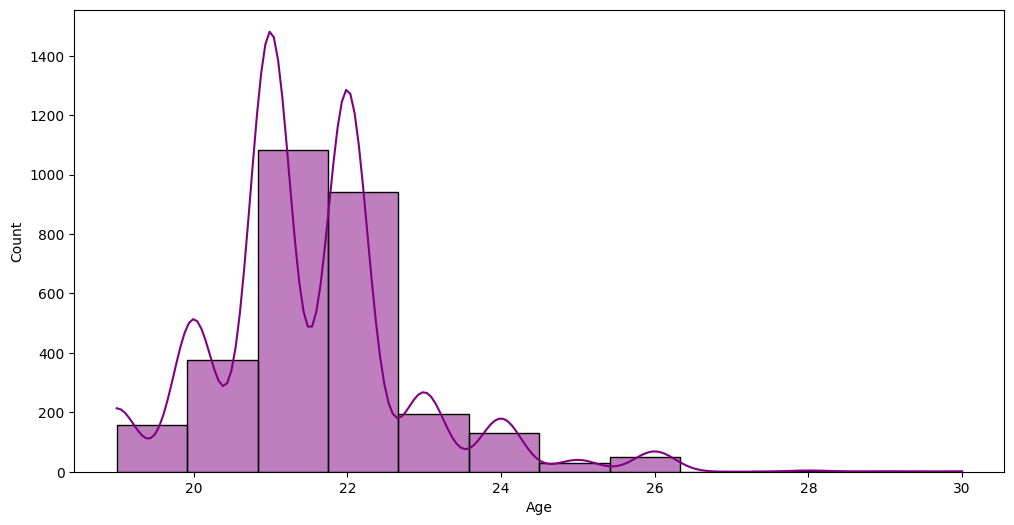

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Age',color='purple',kde=True,bins=12,legend=True)

<Axes: xlabel='CGPA', ylabel='Density'>

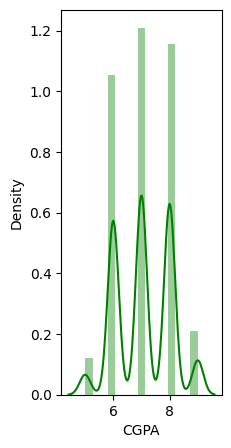

In [ ]:
#univariate anaiysis
plt.figure(figsize=(12,5))
plt.subplot(1,5,2)
sns.distplot(df['CGPA'],color='Green')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

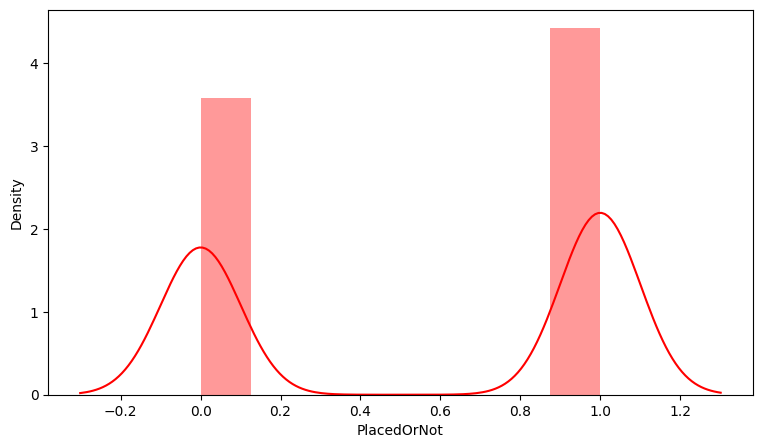

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

# Bivariate Analysis

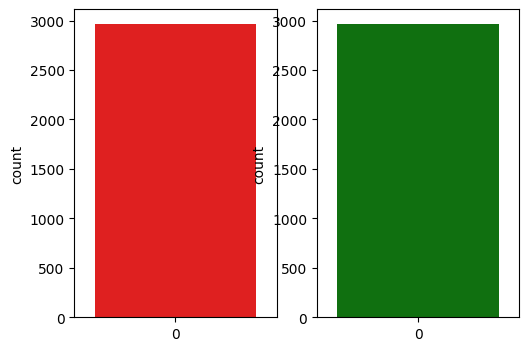

In [ ]:

plt.figure(figsize=(12,4))
plt.subplot(1,4,1)

sns.countplot(df['Gender'],color='r')
plt.subplot(1,4,2)

sns.countplot(df['Age'],color='g')
plt.show()

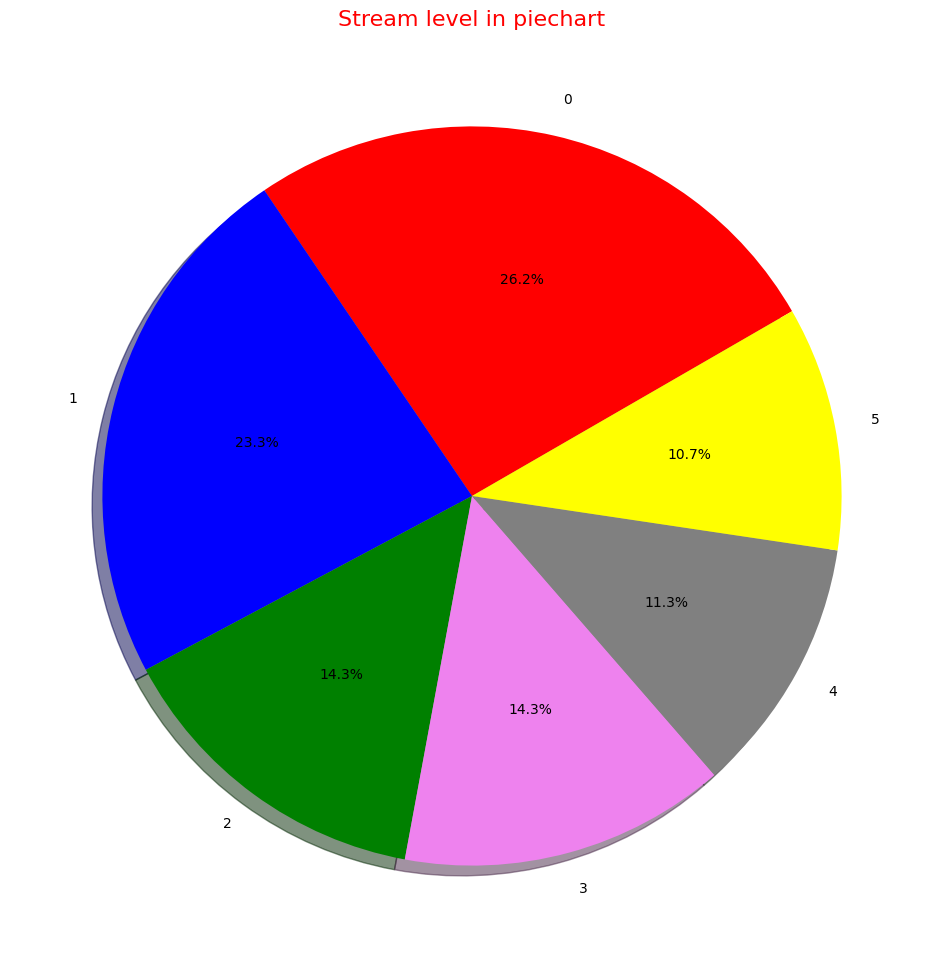

In [ ]:
labels=df["Stream"].value_counts().index
sizes=df["Stream"].value_counts()
colors=['red','blue','green','violet',"grey","yellow"]
plt.figure(figsize=(12,12))
plt.pie(sizes,labels=labels,rotatelabels=False,autopct='%1.1f%%',colors=colors,shadow=True,startangle=30)
plt.title("Stream level in piechart",color='r',fontsize=16)
plt.show()

#multivariate analysis

<Axes: xlabel='count', ylabel='Internships'>

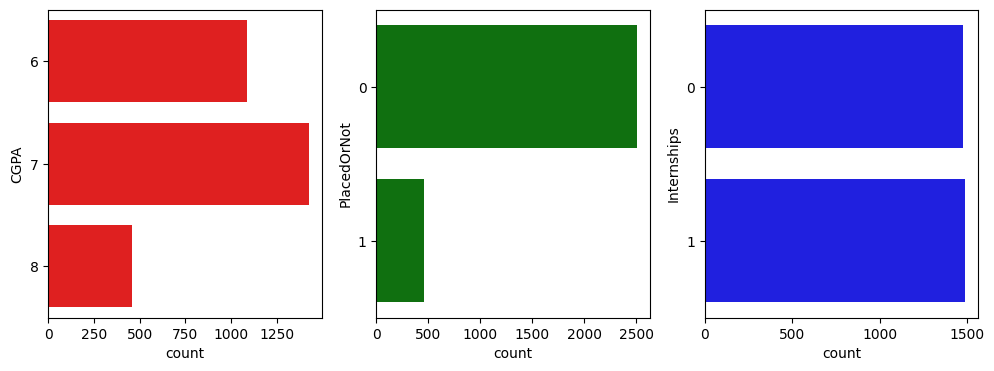

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.countplot(df['CGPA'],y=df['Age'],color='red')
plt.subplot(132)
sns.countplot(df['PlacedOrNot'],y=df['Age'],color='green')
plt.subplot(133)
sns.countplot(df['Internships'],y=df['Age'],color='blue')

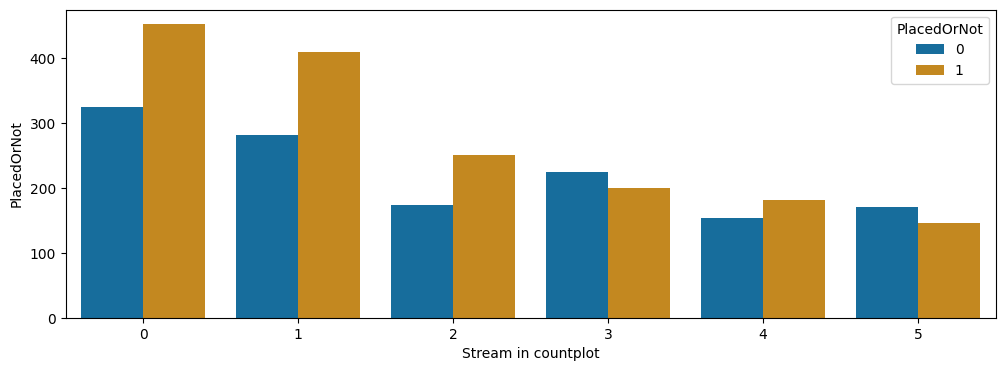

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x=df["Stream"],hue=df["PlacedOrNot"], palette="colorblind")
plt.xlabel("Stream in countplot")
plt.ylabel("PlacedOrNot")
plt.show()

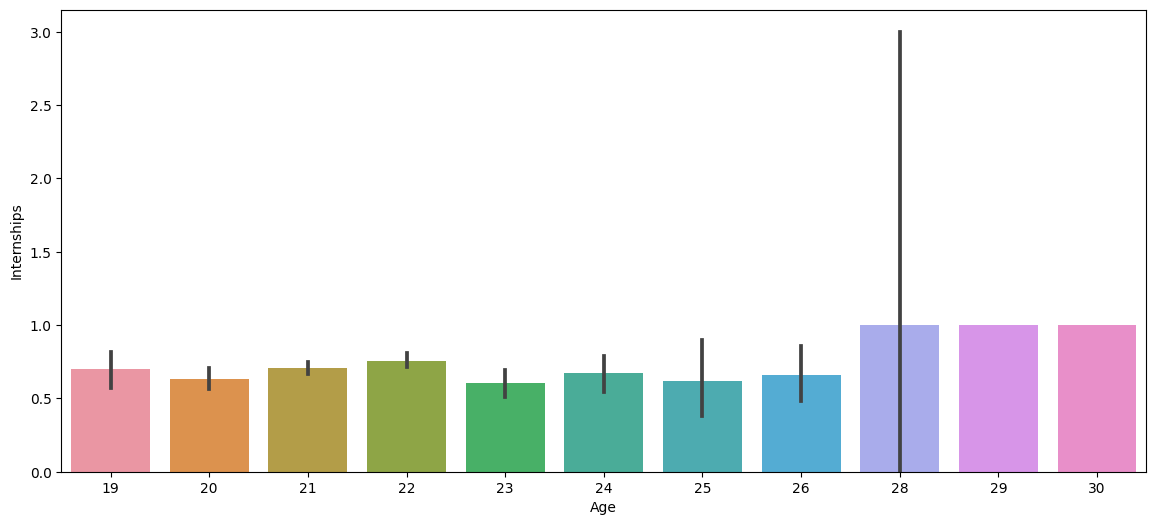

In [ ]:
plt.figure(figsize=(14,6))
sns.barplot(data=df,x='Age',y='Internships')
plt.show()

In [ ]:
#Multivariate analysis

<Axes: xlabel='Age', ylabel='CGPA'>

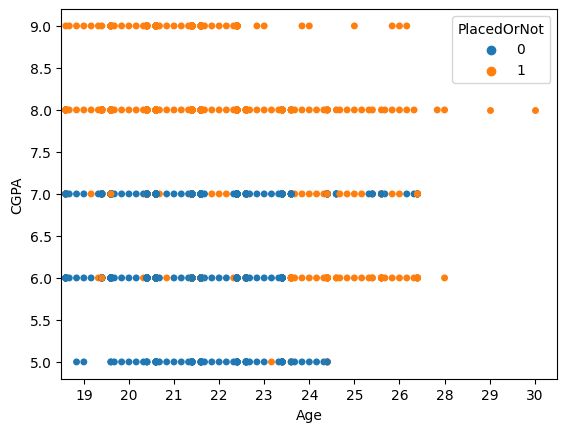

In [ ]:
sns.swarmplot(x=df['Age'],y=df['CGPA'],hue=df['PlacedOrNot'])

In [ ]:
#column define

In [ ]:
data=df.drop('PlacedOrNot',axis=1)
column=[column for column in data.columns if  df[column].dtype!='PlacedOrNot']
column

['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'HistoryOfBacklogs']

In [ ]:
x=df.drop('PlacedOrNot',axis=1)

x

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,2,1,8,1
1,21,0,0,0,7,1
2,22,0,1,1,6,0
3,21,1,1,0,8,1
4,22,1,3,0,8,0
...,...,...,...,...,...,...
2961,23,1,1,0,7,0
2962,23,1,3,1,7,0
2963,22,1,1,1,7,0
2964,22,1,0,1,7,0


In [ ]:
#Splitting the data into train and test
y=df['PlacedOrNot']
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

#Scaling data

In [ ]:
#scaling data
names=data[column]
sc=StandardScaler()
x_bal=sc.fit_transform(x)
x_bal=pd.DataFrame(x_bal,columns=data.columns)


In [ ]:
#independent variables
x=df.iloc[:,0:6]
x.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,22,1,2,1,8,1
1,21,0,0,0,7,1
2,22,0,1,1,6,0
3,21,1,1,0,8,1
4,22,1,3,0,8,0


In [ ]:
#dependent   variables
y=df.iloc[:,6:]
y.head()

,PlacedOrNot
0,1
1,1
2,1
3,1
4,1


#Spilting  the data into  train and test

In [ ]:
#split& train test data
from   sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(2372, 6) (594, 6)
(2372, 1) (594, 1)


In [ ]:
x_test

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
2395,20,1,1,0,7,1
794,22,1,0,2,8,1
1894,21,1,1,1,8,0
332,22,1,2,0,7,0
2023,19,1,5,1,7,1
...,...,...,...,...,...,...
1938,22,0,0,1,8,1
2607,20,1,1,0,8,0
1395,22,1,3,0,7,1
602,21,1,0,2,7,0


In [ ]:
y_test

,PlacedOrNot
2395,0
794,1
1894,1
332,0
2023,0
...,...
1938,1
2607,1
1395,0
602,1


# Model building

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import pickle


In [ ]:
model_accuracy={}
cv=KFold(n_splits=9,random_state=10,shuffle=True)

# SVM model 

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier =  svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)
SVC(kernel='linear')
x_train_prediction = classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy score of the training data:',training_data_accuracy)



Accuracy score of the training data: 0.7824620573355818


# Knn model

In [ ]:
best_k = {"Regular":0}
best_score ={"Regular":0}
for k in range (3,50,2):
  ##using Regular training set
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train,y_train)
  knn_temp_pred = knn_temp.predict(x_test)
  score = metrics.accuracy_score(y_test,knn_temp_pred)*100
  if  score>=best_score["Regular"] and score < 100:
      best_score["Regular"] = score
      best_k["Regular"]=k
print("----Results-\nk:  {}nScore:{}".format(best_k,best_score))
knn= KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
testd = accuracy_score(knn_pred,y_test)


----Results-
k:  {'Regular': 13}nScore:{'Regular': 88.21548821548821}


# Artificial neural network model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow .keras import layers

In [ ]:
classifier=Sequential()
#add input layer and first hidden layer
classifier.add(keras.layers.Dense(6,activation='relu',input_dim=6))
classifier.add(keras.layers.Dropout(0.50))
#add 2nd hidden layer
classifier.add(keras.layers.Dense(6,activation='relu'))
classifier.add(keras.layers.Dropout(0.50))
#final or output layer
classifier.add(keras.layers.Dense(1,activation='sigmoid'))



In [ ]:
#compiling the model
loss_1=tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])


In [ ]:
#fitting the model
classifier.fit (x_train,y_train,batch_size=15,epochs=50)

Epoch 1/50
159/159 [==============================] - 1s 1ms/step - loss: 2.2144 - accuracy: 0.4966
Epoch 2/50
159/159 [==============================] - 0s 1ms/step - loss: 1.1315 - accuracy: 0.4949
Epoch 3/50
159/159 [==============================] - 0s 1ms/step - loss: 0.8116 - accuracy: 0.4760
Epoch 4/50
159/159 [==============================] - 0s 1ms/step - loss: 0.7207 - accuracy: 0.4739
Epoch 5/50
159/159 [==============================] - 0s 1ms/step - loss: 0.7052 - accuracy: 0.5329
Epoch 6/50
159/159 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5729
Epoch 7/50
159/159 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5653
Epoch 8/50
159/159 [==============================] - 0s 1ms/step - loss: 0.6887 - accuracy: 0.5704
Epoch 9/50
159/159 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5793
Epoch 10/50
159/159 [==============================] - 0s 1ms/step - loss: 0.6841 - accuracy: 0.5767

In [ ]:
logr=LogisticRegression(solver ='liblinear')
logr.fit(x_train,y_train)
pred_train=logr.predict(x_train)
pred_train
pred_test=logr.predict(x_test)
pred_test
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
print("Train confusion matrix:\n",confusion_matrix(pred_train,y_train))
print("Test confusion matrix:\n",confusion_matrix(pred_test,y_test))

Train confusion matrix:
 [[ 762  255]
 [ 285 1070]]
Test confusion matrix:
 [[191  80]
 [ 89 234]]


In [ ]:
print("test accuracy:",accuracy_score(pred_test,y_test)*100)

test accuracy: 71.54882154882155


In [ ]:
kn_model=KNeighborsClassifier(n_neighbors=18)
kn_model.fit(x_train,y_train)
kn_score=kn_model.score(x_test,y_test)
model_accuracy['Knn']=kn_score*100
kn_score*100

87.54208754208754

In [ ]:
ran_model=RandomForestClassifier(n_estimators=5)
ran_model.fit(x_train,y_train)
ran_score=ran_model.score(x_test,y_test)
model_accuracy['RanForest']=ran_score*100
ran_score*100

87.03703703703704

In [ ]:
ada_model = AdaBoostClassifier(n_estimators=10)
ada_model.fit(x_train,y_train)
ada_score=ada_model.score(x_test,y_test)
model_accuracy['AdaBoost']=ada_score*100
ada_score*100

88.04713804713805

In [ ]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model=pickle.load(open('placement.pkl','rb'))